In [5]:
from sklearn import svm, metrics
import glob, os.path, re, json

files=glob.glob("./language/train/*.txt") #폴더 내 텍스트 파일 추출

for file_name in files:
    basename=os.path.basename(file_name)
    print(file_name)
    print(basename)
    print("---")

./language/train/tl-20.txt
tl-20.txt
---
./language/train/en-5.txt
en-5.txt
---
./language/train/en-4.txt
en-4.txt
---
./language/train/en-1.txt
en-1.txt
---
./language/train/en-3.txt
en-3.txt
---
./language/train/fr-8.txt
fr-8.txt
---
./language/train/tl-18.txt
tl-18.txt
---
./language/train/fr-10.txt
fr-10.txt
---
./language/train/tl-19.txt
tl-19.txt
---
./language/train/fr-9.txt
fr-9.txt
---
./language/train/en-2.txt
en-2.txt
---
./language/train/id-15.txt
id-15.txt
---
./language/train/id-14.txt
id-14.txt
---
./language/train/id-13.txt
id-13.txt
---
./language/train/id-12.txt
id-12.txt
---
./language/train/id-11.txt
id-11.txt
---
./language/train/fr-7.txt
fr-7.txt
---
./language/train/tl-17.txt
tl-17.txt
---
./language/train/tl-16.txt
tl-16.txt
---
./language/train/fr-6.txt
fr-6.txt
---


In [21]:
from sklearn import svm, metrics

files=glob.glob("./language/train/*.txt") #폴더 내 텍스트 파일 추출
train_data=[]
train_label=[]

for fname in files:
    #레이블 구하기
    basename=os.path.basename(fname)
    lang=basename.split("-")[0]
    
    #텍스트 추출하기
    with open(fname, "r", encoding="utf-8") as f:
        text=f.read()
        text=text.lower() #소문자 변환
    
      
    #알파벳 출현 빈도 구하기
    code_a=ord("a")
    code_z=ord("z")
    cnt=[0 for n in range(0,26)] #26개의 0
    for char in text:
        code_current=ord(char)
        if code_a <= code_current <= code_z:
            cnt[code_current-code_a]+=1 
    #정규화하기
    total=sum(cnt)
    freq=list(map(lambda n: n/total, cnt))
    
    
    #리스트에 넣기
    train_label.append(lang)
    train_data.append(freq)

files=glob.glob("./language/test/*.txt") #폴더 내 텍스트 파일 추출
test_data=[]
test_label=[]    
for fname in files:
    #레이블 구하기
    basename=os.path.basename(fname)
    lang=basename.split("-")[0]
    
    #텍스트 추출하기
    with open(fname, "r", encoding="utf-8") as f:
        text=f.read()
        text=text.lower() #소문자 변환
    
      
    #알파벳 출현 빈도 구하기
    code_a=ord("a")
    code_z=ord("z")
    cnt=[0 for n in range(0,26)] #26개의 0
    for char in text:
        code_current=ord(char)
        if code_a <= code_current <= code_z:
            cnt[code_current-code_a]+=1 
    #정규화하기
    total=sum(cnt)
    freq=list(map(lambda n: n/total, cnt))
    
    #리스트에 넣기
    test_label.append(lang)
    test_data.append(freq)
   

#학습시키기
clf=svm.SVC()
clf.fit(train_data, train_label)
predict=clf.predict(test_data)
score=metrics.accuracy_score(test_label, predict)
print("score=",score)
report=metrics.classification_report(test_label, predict)
print("report=",report)

score= 0.875
report=              precision    recall  f1-score   support

         en       0.67      1.00      0.80         2
         fr       1.00      1.00      1.00         2
         id       1.00      0.50      0.67         2
         tl       1.00      1.00      1.00         2

avg / total       0.92      0.88      0.87         8



In [26]:
#함수화 하기 
from sklearn import svm, metrics
import glob, os.path, re, json

def check_freq(fname):
    basename=os.path.basename(fname)
    lang=basename.split("-")[0]
    
    #텍스트 추출하기
    with open(fname, "r", encoding="utf-8") as f:
        text=f.read()
        text=text.lower() #소문자 변환
      
    #알파벳 출현 빈도 구하기
    code_a=ord("a")
    code_z=ord("z")
    cnt=[0 for n in range(0,26)] #26개의 0
    
    #알파벳 출현 횟수 구하기
    for char in text:
        code_current=ord(char)
        if code_a <= code_current <= code_z: #a와 z 사이에 있을 때
            cnt[code_current-code_a]+=1 
    #정규화하기
    total=sum(cnt)
    freq=list(map(lambda n: n/total, cnt))
    return (freq, lang)

#각 파일 처리하기
def load_files(path):
    freqs=[]
    labels=[]
    file_list=glob.glob(path)

    for fname in file_list:
        r=check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}

data=load_files("./language/train/*.txt")
test=load_files("./language/test/*.txt")

#JSON으로 결과 저장
with open ("./language/freq.json","w",encoding="utf-8") as fp:
    json.dump([data, test],fp)
    
#학습하기
clf=svm.SVC()
clf.fit(data['freqs'], data['labels'])

#예측하기
result=clf.predict(test['freqs'])

#결과테스트하기
score=metrics.accuracy_score(test["labels"],predict)
report=metrics.classification_report(test["labels"],predict)
print("정답률=",score)
print("리포트=",report)
    

정답률= 0.875
리포트=              precision    recall  f1-score   support

         en       0.67      1.00      0.80         2
         fr       1.00      1.00      1.00         2
         id       1.00      0.50      0.67         2
         tl       1.00      1.00      1.00         2

avg / total       0.92      0.88      0.87         8



         tl        en        fr        id
a  0.202369  0.073806  0.072599  0.180053
b  0.022730  0.020368  0.015761  0.025664
c  0.019562  0.031099  0.039836  0.008246
d  0.037057  0.039641  0.051129  0.046101
e  0.064196  0.141261  0.157111  0.083582
f  0.005786  0.020368  0.013031  0.005113
g  0.033062  0.020368  0.013527  0.034121
h  0.006750  0.056943  0.014396  0.020827
i  0.075492  0.065046  0.085629  0.088696
j  0.002342  0.003285  0.004344  0.009058
k  0.014740  0.005913  0.001862  0.035923
l  0.050558  0.039641  0.062050  0.035680
m  0.023832  0.028909  0.029039  0.033975
n  0.114892  0.062199  0.073964  0.099912
o  0.067640  0.066141  0.056217  0.034819
p  0.030858  0.018835  0.023455  0.029722
q  0.001791  0.000438  0.005833  0.000179
r  0.039399  0.072492  0.082030  0.056879
s  0.065023  0.059571  0.066518  0.054380
t  0.046150  0.095488  0.061057  0.050208
u  0.027828  0.024967  0.042690  0.043260
v  0.004822  0.010731  0.015140  0.003003
w  0.005786  0.023872  0.000745  0

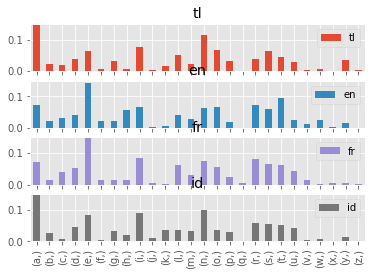

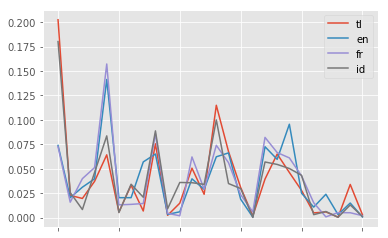

In [6]:
#데이터 그래프 그리기
import matplotlib.pyplot as plt
import pandas as pd
import glob, os.path

files=glob.glob("./language/train/*.txt") #폴더 내 텍스트 파일 추출
train_data=[]
train_label=[]

for fname in files:
    #레이블 구하기
    basename=os.path.basename(fname)
    lang=basename.split("-")[0]
    
    #텍스트 추출하기
    with open(fname, "r", encoding="utf-8") as f:
        text=f.read()
        text=text.lower() #소문자 변환
    
      
    #알파벳 출현 빈도 구하기
    code_a=ord("a")
    code_z=ord("z")
    cnt=[0 for n in range(0,26)] #26개의 0
    for char in text:
        code_current=ord(char)
        if code_a <= code_current <= code_z:
            cnt[code_current-code_a]+=1 
    #정규화하기
    total=sum(cnt)
    freq=list(map(lambda n: n/total, cnt))
    
    
    #리스트에 넣기
    train_label.append(lang)
    train_data.append(freq)

    
#그래프 준비하기
graph_dict={}
for i in range(0,len(train_label)):
    label=train_label[i]
    data=train_data[i]
    if not (label in graph_dict):
        graph_dict[label]=data
                
asclist=[[chr(n) for n in range(97,97+26)]]
df=pd.DataFrame(graph_dict, index=asclist)

print(df)

#바그래프
plt.style.use('ggplot')
df.plot(kind='bar', subplots=True, ylim=(0,0.15))
plt.savefig('lang-barplot.png')

#라인그래프
plt.style.use('ggplot')
df.plot(kind='line')
plt.savefig('lang-lineplot.png')

In [7]:
#웹 인터페이스 만들기
#학습시킨 매개변수 저장

from sklearn import svm
from sklearn.externals import joblib
import json

#각 언어의 출현 빈도 데이터 (JSON) 읽어 들이기
with open ("./language/freq.json","r",encoding="utf-8") as fp:
    d=json.load(fp)
    data=d[0]
    
#데이터 학습시키기
clf=svm.SVC()
clf.fit(data["freqs"], data["labels"])

#학습 데이터 저장하기
joblib.dump(clf, "./language/freq.pkl")
print("ok")

{'freqs': [[0.20236947237911557, 0.02273040363686458, 0.0195619231299077, 0.03705744592919135, 0.06419617027138724, 0.0057859209257473485, 0.033062405289984845, 0.006750241080038573, 0.07549249207879873, 0.00234192037470726, 0.014740322358451578, 0.0505579280892685, 0.02383248381319741, 0.11489185838269735, 0.06764017082242733, 0.03085824493731919, 0.0017908802865408459, 0.039399366303898606, 0.06502273040363686, 0.04614960738393718, 0.027827524452403912, 0.0048216007714561235, 0.0057859209257473485, 0.00041328006612481057, 0.03388896542223447, 0.0030307204849152774], [0.07380639509417433, 0.020367936925098553, 0.031099430573806396, 0.039640823477879984, 0.14126149802890933, 0.020367936925098553, 0.020367936925098553, 0.05694261936049058, 0.06504599211563732, 0.0032851511169513796, 0.005913272010512484, 0.039640823477879984, 0.02890932982917214, 0.06219886114761279, 0.06614104248795445, 0.018834866403854577, 0.0004380201489268506, 0.07249233464739378, 0.059570740254051686, 0.0954883924

In [18]:
#웹에서 쉽게 사용할 수 있는 언어판별 애플리케이션
#!/usr/bin/env python3
import cgi, os.path
from sklearn.externals import joblib

#학습 데이터 읽어들이기
pklfile=os.path.dirname(__file__)+"/freq.pkl"
clf=joblib.load(pklfile)

#텍스트 입력 양식 출력하기
def show_form(text, msg=""):
    print("Content-Type : text/html ; charset=utf-8")
    print("")
    print("""
        <html>
        <body><form>
        <textarea name="text" rows="8" cols="40">{0}</textarea>
        <p><input type="submit" value="판정"></p>
        <p>{1}</p>
        </form></body></html>
    """.format(cgi,escape(text), msg))

#판정하기
def detect_lang(text):
    text=text.lower()
    code_a, code_z = (ord("a"), ord("z"))
    cnt=[0 for i in range(26)]
    for char in text:
        n=ord(char)-code_a
        if 0<= n <= 26:
            cnt[n]+=1
    total=sum(cnt)
    if total ==0: return "입력이 없습니다"
    freq=list(map(lambda n: n/ total, cnt))
    
    #언어 예측하기
    res=clf.predict([freq])
    
    #언어코드 한국어로 변환
    lang_dic={"en":"영어", "fr":"프랑스어", "id":"인도네시아어", "tl": "타갈로그어"}
    return lang_dic[res[0]]

#입력 양식의 값 읽어 들이기
form=cgi.FieldStorage()
text=form.getvalue("text", default="")
msg=""
if text!="":
    lang=detect_lang(text)
    msg="판정 결과: "+ lang
    
#입력 양식 출력
show_form(text, msg)

Content-Type : text/html ; charset=utf-8



/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


NameError: name 'escape' is not defined